# CAD layout reading

Tests done on [floor plan](https://drive.google.com/file/d/1Xw-cIvnZdvCMmrIfRs5FkywCXhw-ASOz/view?usp=sharing) which can be visualized using AutoCAD, [ShareCAD](https://sharecad.org/) or [Autodesk Viewer](https://viewer.autodesk.com/)

In [37]:
!python -m pip install git+https://github.com/ekumenlabs/Frontier-Exploration-with-a-prior.git@OccupancyDataframe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ekumenlabs/Frontier-Exploration-with-a-prior.git (to revision OccupancyDataframe) to /tmp/pip-req-build-exq9pkq0
  Running command git clone -q https://github.com/ekumenlabs/Frontier-Exploration-with-a-prior.git /tmp/pip-req-build-exq9pkq0
  Running command git checkout -b OccupancyDataframe --track origin/OccupancyDataframe
  Switched to a new branch 'OccupancyDataframe'
  Branch 'OccupancyDataframe' set up to track remote branch 'OccupancyDataframe' from 'origin'.


## Layout reading in `.dxf` format

In [38]:
layout_reader = LayoutReader()
layout_reader.clean_and_save("/content/drive/MyDrive/Proyecto final/Floor plan.dxf", "/content/drive/MyDrive/Proyecto final/Floor plan clean.dxf", ["WALL", "DANGEROUS"])

## Layout conversion to occupancy grid
Once the CAD layout has been uploaded, we will create the occupancy grid, defined by squares of `square_size` size, which will be suporposed over the obtained layout.
Having done this, the grid squares that touch the layout lines, will be the ones defined as **occupied blocks** in the occupancy grid.

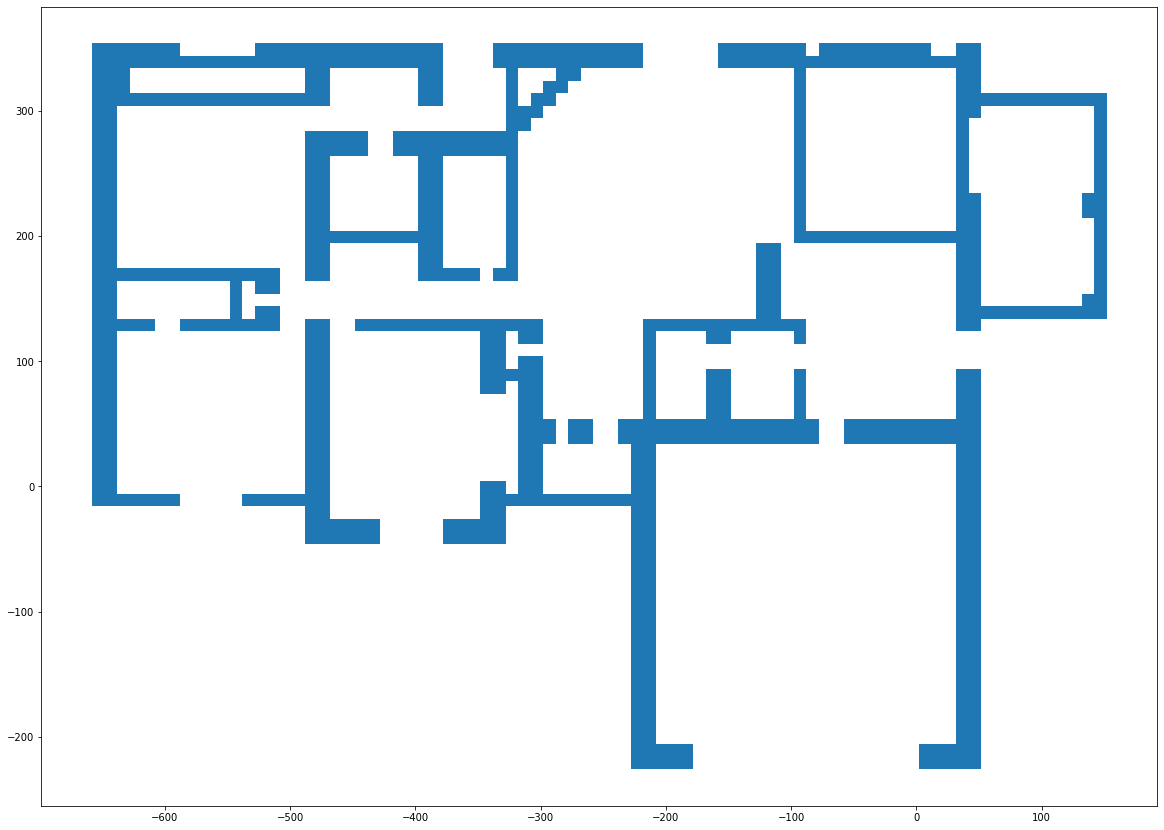

In [39]:
occupancy_df = OccupancyDataFrame("/content/drive/MyDrive/Proyecto final/Floor plan clean.dxf")
occupancy_df.plot(figsize=(20,20))

In [40]:
occupancy_df.occupancy_df

axis_y,-221.0,-211.0,-201.0,-191.0,-181.0,-171.0,-161.0,-151.0,-141.0,-131.0,...,259.0,269.0,279.0,289.0,299.0,309.0,319.0,329.0,339.0,349.0
axis_x,,,,,,,,,,,,,,,,,,,,,
-653.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
-643.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
-633.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
-623.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
-613.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
127.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


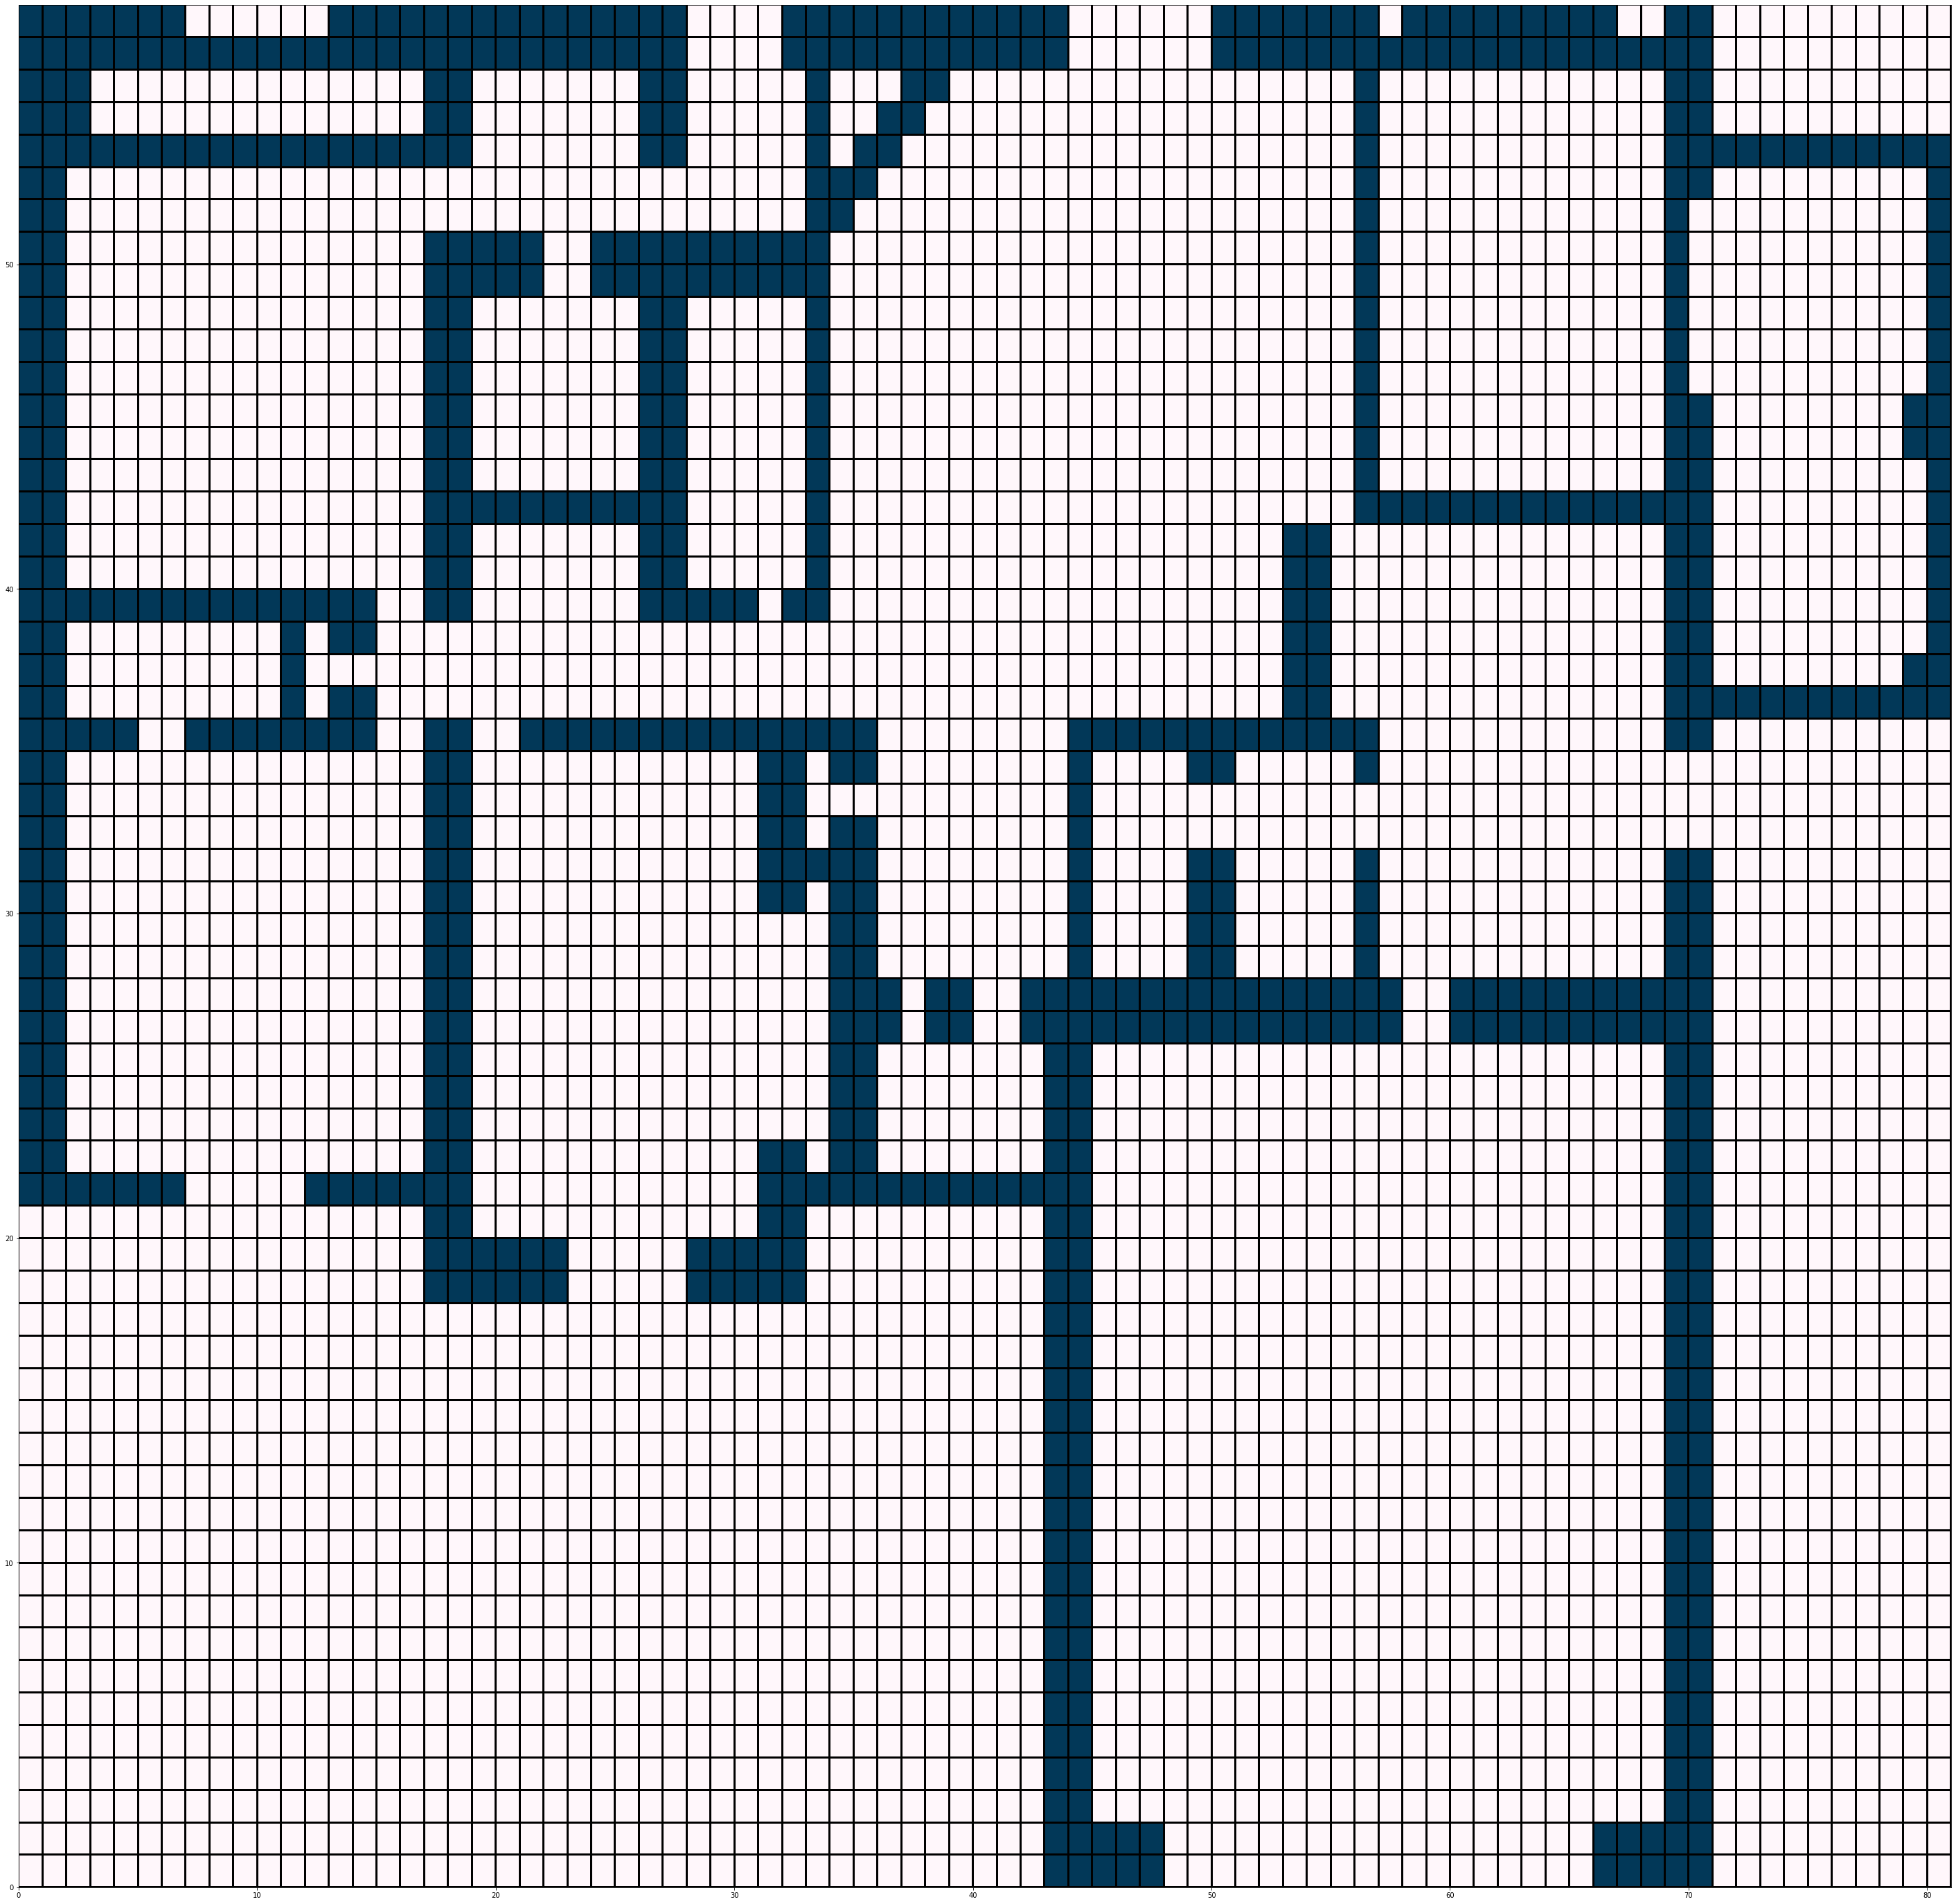

In [41]:
grid = occupancy_df.get_occupancy_grid()
grid.plot(figsize=(50, 50))